# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(6, 6)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |                3985 |
+---------------------+---------------------+
|            取引回数 |                   6 |
+---------------------+---------------------+
|            開始日時 | 2020-03-25 00:58:33 |
+---------------------+---------------------+
|            終了日時 | 2020-03-25 01:17:38 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 00:19:05 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+-----------+
| 開始[JPY]   |      9805 |
+-------------+-----------+
| 終了[JPY]   |     14238 |
+-------------+-----------+
| 利益[JPY]   |      4433 |
+-------------+-----------+
| 開始[BTC]   |  0.021332 |
+-------------+----------

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-03-25 00:58:33,sell,4421.148,buy,4422.912,-1.764
2020-03-25 00:58:47,buy,4426.996,sell,4423.098,-3.898
2020-03-25 01:03:13,sell,4396.650,buy,4395.810,0.840
2020-03-25 01:03:50,buy,4391.994,sell,4390.934,-1.060
2020-03-25 01:17:34,sell,4399.998,buy,4401.390,-1.392
2020-03-25 01:17:38,buy,4401.998,sell,4402.002,0.004


In [12]:
round(sum(profit_df.profit), 3)

-7.27

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(3985, 3985)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

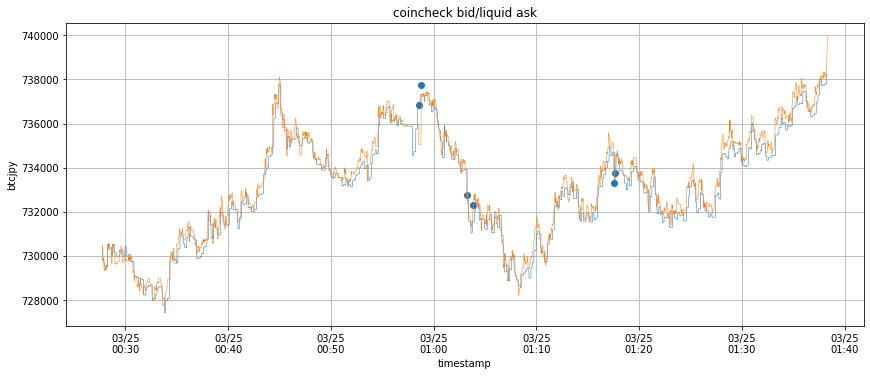

In [16]:
fig1

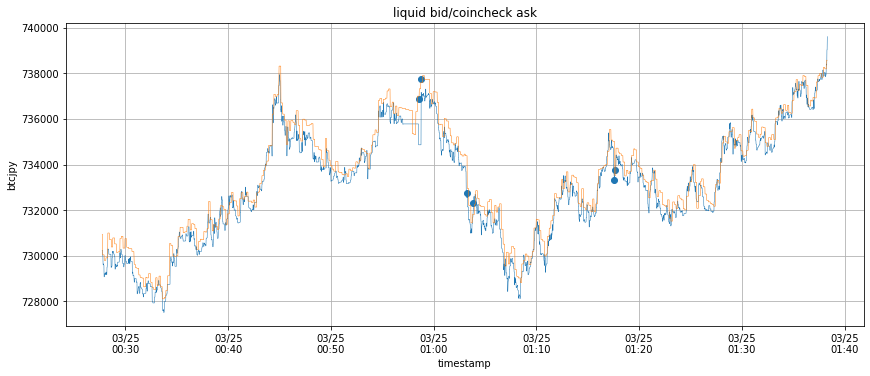

In [17]:
fig2